# SLU03 | Visualization with Pandas and Matplotlib: Exercise notebook
***

## Start by importing these packages

In [1]:
# for evaluation purposes
import hashlib

import pandas as pd
import numpy as np
import plotchecker
from plotchecker import PlotChecker
import seaborn as sns

def _hash(s):
    """Function used to hash the answers and compare with the right answer."""
    
    return hashlib.blake2b(
        bytes(str(s), encoding='utf8'),
        digest_size=5
    ).hexdigest()

def get_data(p, ax=0):
    """Gets data from plot and concatenates it.
    
    This is required for hashing the plot results.
    """
    all_x_data = []
    lines = p.axis.get_lines()
    collections = axis.collections
    if len(lines) > 0:
        all_x_data.append(np.concatenate([x.get_xydata()[:, ax] for x in lines]))
    if len(collections) > 0:
        all_x_data.append(np.concatenate([x.get_offsets()[:, ax] for x in collections]))
    return np.concatenate(all_x_data, axis=0)

## Learning Objectives for Data Visualization

In this exercise notebook, we will explore various data visualization techniques using the "ds_salaries" dataset from https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries/. Our main objective is to gain insights if it is worth doing this data science course at all. Therefor we look at the factors that influence data science job salaries and understand the salary trends within the data science field. By working with a subset of the original dataset, we will cover the following learning objectives:

**Basics of Data Visualization**
   - Gain an understanding of the fundamental principles of data visualization and its importance in extracting insights from data.
   
**Salary by Geographic Location**
   - Visualize salary disparities with a scatter plot based on the companies locations. We'll examine better plots on how to visualize compensation variation by geographic location. This will help give us insights into regional salary trends.
   
**Analyzing Salary by Job Title**
   - Discover data visualization techniques to explore salary distributions across various job titles in data science. We want to see which roles are associated with higher or lower compensation, so we know for which we are going to apply after the LDSA Data Science course.

**Exploring Salary vs. Experience**
   - Visualize the relationship between salary and experience levels in the data science field. We will look for that trend and hope we find a line that keeps going up.

**Identifying Outliers**
   - Dive into visualization to identify potential outliers in the salary data, which may be individuals with exceptionally high or low salaries. It would be interesting to know if those exceptionally high salaries are just a typo in our dataset or .... we like to know more about this individuals. 

**Exploring Salary Distribution**
   - Create visual representations of the overall distribution of salaries in the data science job market. This will help us understand the typical salary ranges.

Now, let's embark on our journey into the world of data visualization with the "ds_salaries" dataset.

In [2]:
# Load the dataset
ds_salaries = pd.read_csv("data/ds_salaries.csv")

# Select the specific columns you want to display
selected_columns = ["work_year", "experience_level", "job_title", "salary_in_usd", "employee_residence", "company_location", "company_size"]
ds_salaries = ds_salaries[selected_columns]

# Display the first few rows of the modified DataFrame
rows, columns = ds_salaries.shape
print(f'ds_salaries: {rows} records and {columns} fields.');
ds_salaries.head()


ds_salaries: 607 records and 7 fields.


,work_year,experience_level,job_title,salary_in_usd,employee_residence,company_location,company_size
0,2020,MI,Data Scientist,79833,DE,DE,L
1,2020,SE,Machine Learning Scientist,260000,JP,JP,S
2,2020,SE,Big Data Engineer,109024,GB,GB,M
3,2020,MI,Product Data Analyst,20000,HN,HN,S
4,2020,SE,Machine Learning Engineer,150000,US,US,L


For these exercises we will use `matplotlib.pyplot` module. We will start by importing it with some ✨magic✨.

In [3]:
import matplotlib.pyplot as plt

%matplotlib inline

## Exercise 1

To start, you are going to change some default settings as follows in the next cell:
* change the default pyplot chart size to 9 inches width and 9 inches height   
* change 'lines.linewidth' to 5   
* change 'lines.linestyle' to be a striped line '--'


In [4]:
# YOUR CODE HERE
plt.rcParams["figure.figsize"] = [9, 9]

plt.rcParams['lines.linewidth'] = 5

plt.rcParams['lines.linestyle'] = '--'

In [5]:

# Check the default figure size
assert plt.rcParams['figure.figsize'] == [9.0, 9.0], 'Default figure size is incorrect'

# Check the default line width
assert plt.rcParams['lines.linewidth'] == 5, 'Default line width is incorrect'

# Check the default line style
assert plt.rcParams['lines.linestyle'] == '--', 'Default line style is incorrect'


print('It seems to work! I am curious how it will look like. You too?')

It seems to work! I am curious how it will look like. You too?


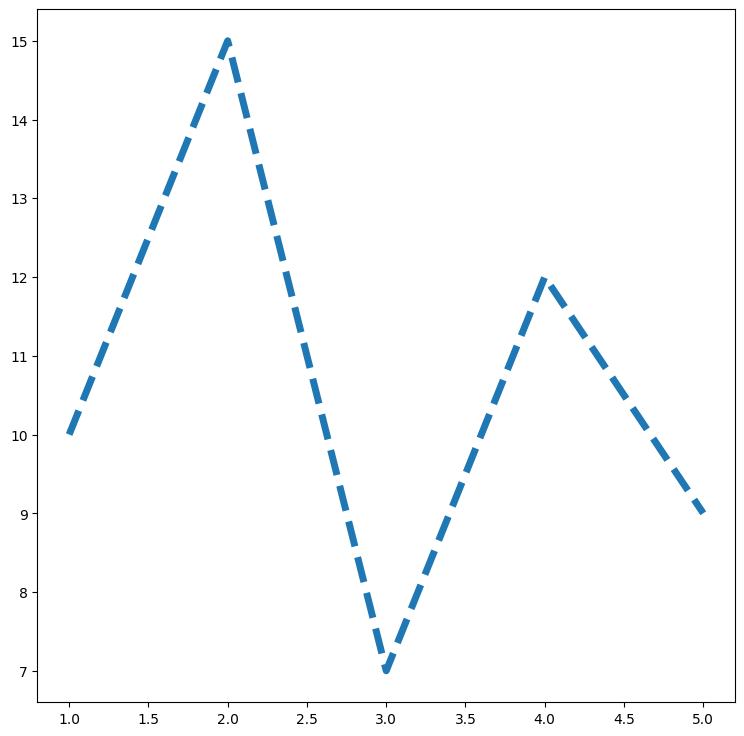

In [6]:
# lets see how those settings look like with the following dataset
x = [1, 2, 3, 4, 5]
y = [10, 15, 7, 12, 9]

plt.plot(x,y); # ps.. do you remember the reason why we use ";" ?

## 🛑 Important note about the grading

**Grading plots is difficult**, we are using `plotchecker` to grade the plots with `nbgrader`. 
For `plotchecker` to work with `nbgrader`, **we need to add on each cell**, the line

> **`axis = plt.gca();`**

**After the code required** to do the plot.

<div class="alert alert-danger">
    ⚠️ <b>NOTE: </b>If you get the <b>ImportError</b>, <i>plotchecker not defined</i>, make sure you activate the right environment for this unit!
</div>

> **For example**, *if we want to plot a `scatter plot` showing the relationship between **`company_location`** and **`salary_in_usd`**  columns, we would do as follows:*

/var/folders/zy/9r4gn9b574gdnv2l9zms0bz40000gn/T/ipykernel_8473/406324443.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  scatter_plot.set_xticklabels(ds_salaries['company_location'], rotation=90)


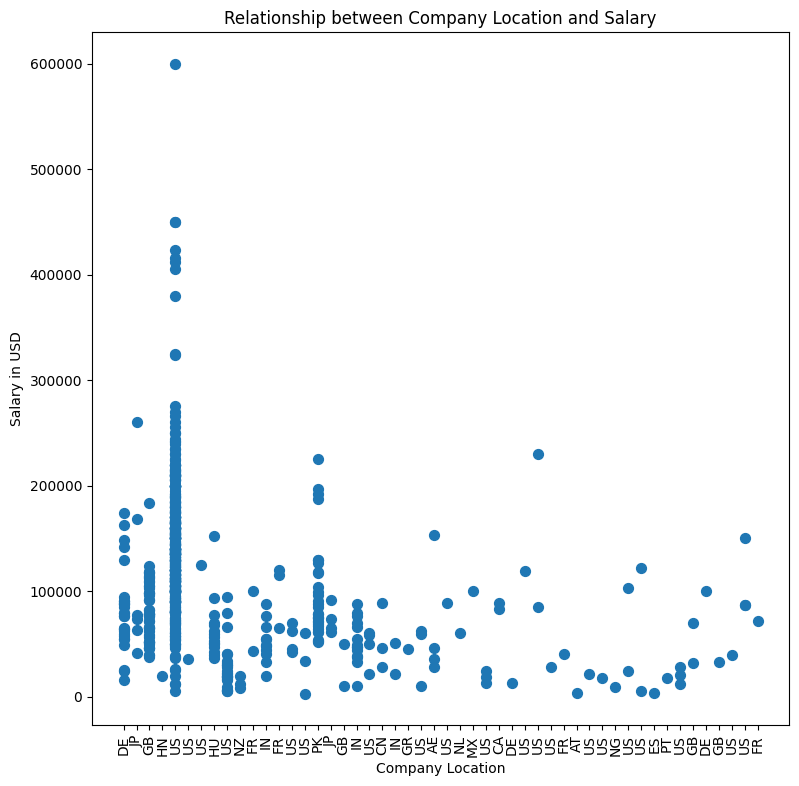

In [7]:
# Create a scatter plot
scatter_plot = ds_salaries.plot.scatter(x='company_location', y='salary_in_usd', s=50)

# Rotate x-axis labels vertically
scatter_plot.set_xticklabels(ds_salaries['company_location'], rotation=90)

# Set labels and title
plt.xlabel('Company Location')
plt.ylabel('Salary in USD')
plt.title('Relationship between Company Location and Salary')

# Last line in the cell required to "capture" the cell and grade it with nbgrader
axis = plt.gca();

# Don´t mind the UserWarning iF you got one. 

## Exercise 2

In the above scatter plot we see the salary by geographic location. But I bet there will be a much better way to visualise this data. 

A heatmap would be a beautiful way to visualize salary trends by region. But which plot can show best the average salaries for the different locations?

    A. Scatter plot   
    B. Bar plot   
    C. Histogram   
    D. Line plot   
    
Leave your answer below, assigned to the `exercise_2_plot_type` variable as a string. For example:
```
exercise_2_plot_type = 'E'
```

In [8]:
# YOUR CODE HERE

exercise_2_plot_type = 'B'




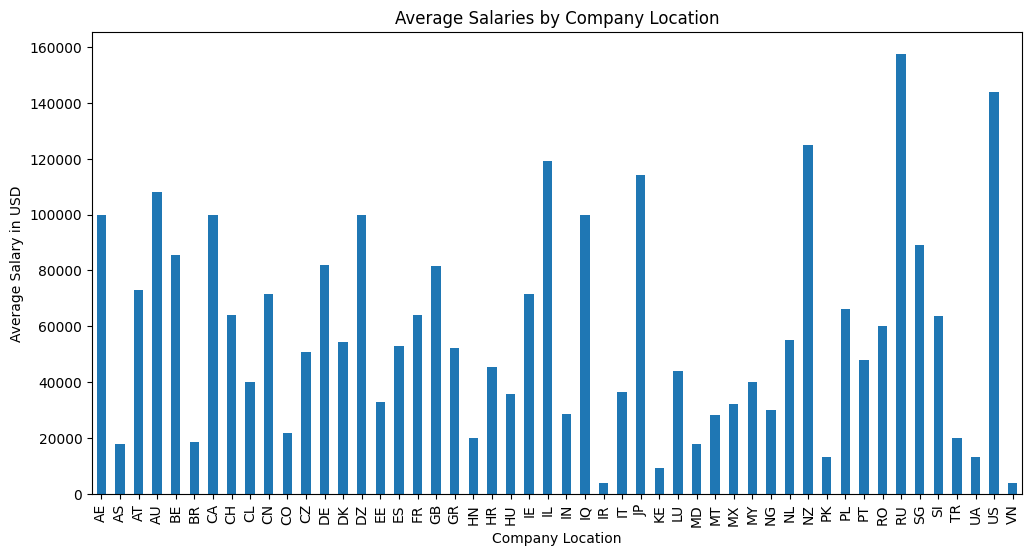

That is correct. Great! Here you can see the an example of the plot


In [9]:

assert _hash(exercise_2_plot_type) == '90a8cbb480', 'Try again'

if _hash(exercise_2_plot_type) == '90a8cbb480':
    plot = ds_salaries.groupby('company_location')['salary_in_usd'].mean().plot(kind='bar', figsize=(12, 6))
    plot.set_xlabel('Company Location')
    plot.set_ylabel('Average Salary in USD')
    plot.set_title('Average Salaries by Company Location')
    plt.show()  # Display the plot to students
    
    print('That is correct. Great! Here you can see the an example of the plot')



Lets explore Salary vs. Experience. A scatter plot or a line plot is suitable for this purpose. A scatter plot can show the relationship between salary and experience levels for individual data points. A line plot can help visualize trends in how salaries vary with different levels of experience over time. 

The experience level in the job during the year does have the following possible values: EN Entry-level / Junior MI Mid-level / Intermediate SE Senior-level / Expert EX Executive-level / Director

You are going to make a line plot with the following settings:

- set the plot **title** to **`Salary vs Experience`**.
- label the **x-axis** as **`experience_level`**.
- label the **y-axis** as **`salary_in_usd`**.

Before plotting, we will reset matplotlib's parameters to the default ones.


In [10]:
plt.style.use('default')

<div class="alert alert-info">
    To have a more realistic idea of this relation we are going to group by the job title and therefor we need to perform a <b><a href='https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html'>aggregation</a></b>, pandas support this by doing a technique called <b>
    <a href='https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html'>Split-Apply-Combine</a></b>. <b>This will be explained in the Data Wrangling Specialization.</b> For now we will do the grouping for you:
</div>

In [11]:
# Groupby the experience level and get the mean of the salaries
grouped_by_experience = ds_salaries.groupby('experience_level')['salary_in_usd'].mean().reset_index(); 

# Define the custom order of indices
custom_order = [0, 2, 3, 1]

# Reindex the DataFrame based on the custom order
grouped_by_experience = grouped_by_experience.reindex(custom_order).reset_index(drop=True)


grouped_by_experience.head()

,experience_level,salary_in_usd
0,EN,61643.318182
1,MI,87996.056338
2,SE,138617.292857
3,EX,199392.038462


<div class="alert alert-warning">
⚠️ <b>NOTE: </b>Make sure you use the dataframe named <b>grouped_by_experience</b> for the exercise
</div>

set the plot title to Salary vs Experience.

label the x-axis as experience_level.

label the y-axis as salary_in_usd.


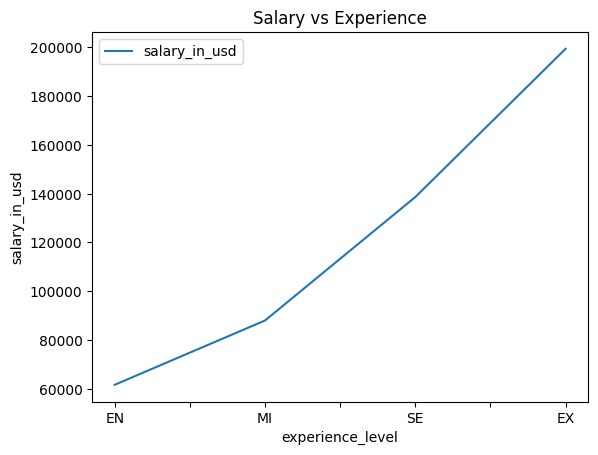

In [12]:
# YOUR CODE HERE
grouped_by_experience.plot(x = 'experience_level', y= 'salary_in_usd', kind = 'line')
plt.xlabel('experience_level')
plt.ylabel('salary_in_usd')
plt.title('Salary vs Experience')

axis = plt.gca();  

In [13]:
pc = PlotChecker(axis)
data = get_data(pc)
l = [pc.xlabel] + [pc.ylabel]
l.sort()

assert _hash(len(data)) == '1450aa501b', "Did you set the right variables for the plot axes?"
assert _hash(l) in ['f2af386122'], "Did you set the right variables for the plot axes?"
assert _hash(get_data(pc,1)) in ['7b910ab896'], "Did you set the right variables for the plot axes?"


print('This is such good news! It seems that after getting more experienced the salary accelerating going up.')


This is such good news! It seems that after getting more experienced the salary accelerating going up.


## Exercise 3

For analyzing salary distributions by various job titles in data science, there are different ways we can plot this. Which plot provides the most detailed view of the salary distibutions?

    A. Box plot  
    B. Line plot   
    C. Histogram   
    D. Bar plot   

In [14]:
# YOUR CODE HERE
exercise_3_plot_type = 'A'

In [15]:
assert _hash(exercise_3_plot_type) == 'b685b2f862', 'Try again'

print('YES! Indeed, those are great for this. Lets make one! ')


YES! Indeed, those are great for this. Lets make one! 


Lets visualize this plot that has the following instructions:

* Use 'job_title' en 'salary_in_usd' from the ds_salaries dataset 
* set the figure to **figsize=(15, 10)**
* create this specific plot with the following groupby:
    - data.groupby('job_title')['salary_in_usd'].apply(list), vert=False)
* use **plt.yticks(range(1, len(data['job_title'].unique()) + 1), data['job_title'].unique())**
* label x as 'Salary in USD'
* label y as 'Salary Distribution by Job Title'


In [16]:
data = ds_salaries.copy()

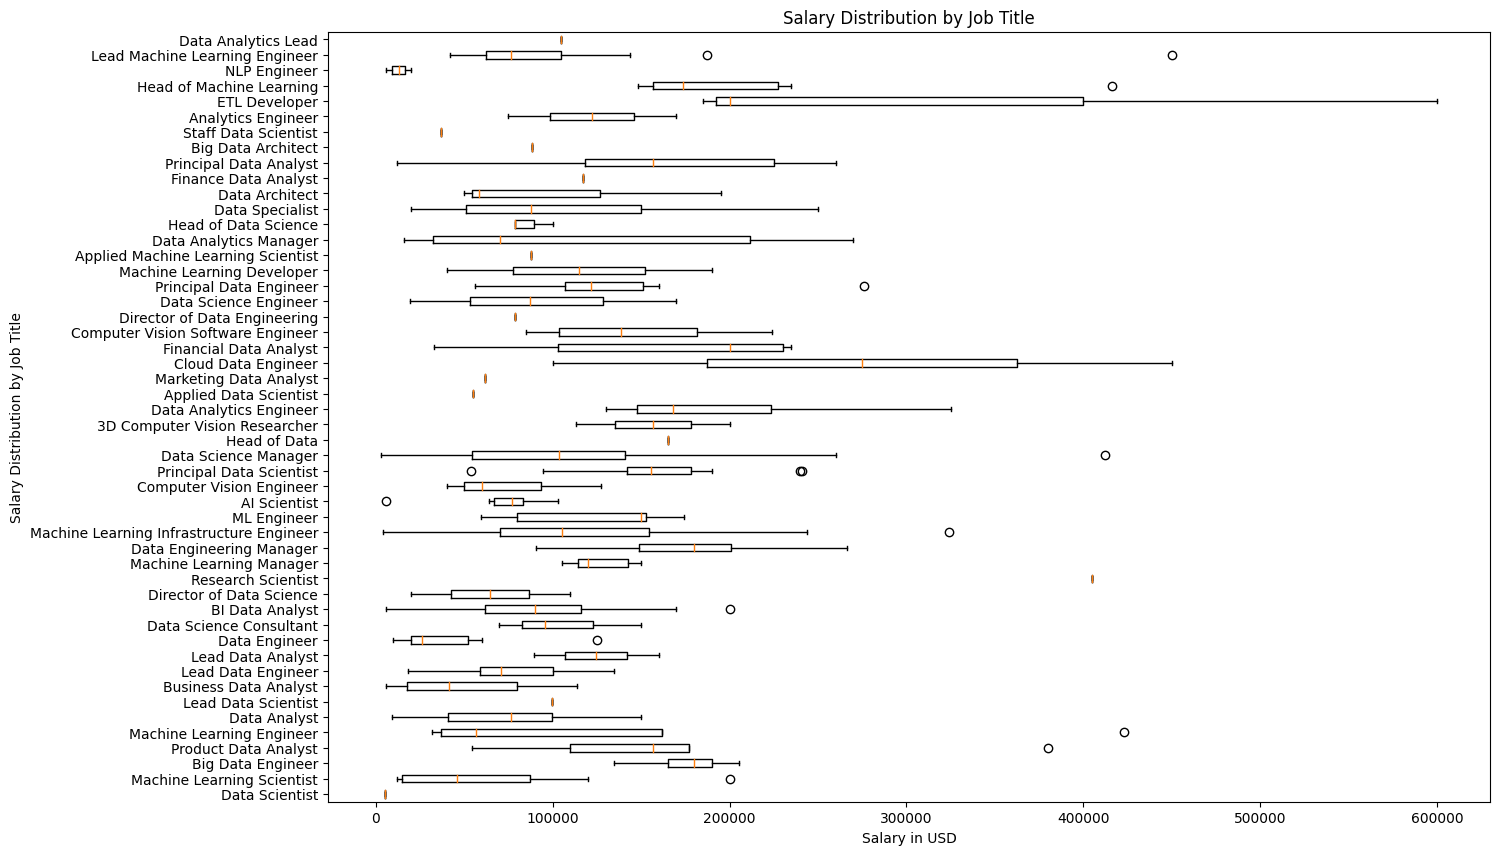

In [17]:
# YOUR CODE HERE
# Set figure size
plt.figure(figsize=(15, 10))


# Plotting
plt.boxplot(data.groupby('job_title')['salary_in_usd'].apply(list), vert=False)

# Set yticks
plt.yticks(range(1, len(data['job_title'].unique()) + 1), data['job_title'].unique())

# Set labels and title
plt.xlabel('Salary in USD')
plt.ylabel('Salary Distribution by Job Title')
plt.title('Salary Distribution by Job Title')




axis = plt.gca(); 


In [18]:
pc = PlotChecker(axis)

assert _hash(data['job_title'].unique()) in ['411d8e6455'], "Did you filter on job_title?"

pc.assert_xlabel_equal('Salary in USD'), "The x label seems wrong"
pc.assert_title_equal('Salary Distribution by Job Title'), "Did you put a title for your plot?"


print('That was AWESOME!! Did you already made up your mind for your new jobtitel? Please pay attention to those lost dots btw... what is happening there? interesting.. We call them outliers and will get back to that. ')


That was AWESOME!! Did you already made up your mind for your new jobtitel? Please pay attention to those lost dots btw... what is happening there? interesting.. We call them outliers and will get back to that. 


## Exercise 4

Often we want to check if our assumptions are true. We look at our variables and with some logic we assume they will be influenced by eachother or the same factors. Which plot is most usefull to help us understand the correlation between two different variables?

    A. Box plot   
    B. Scatter plot  
    C. Histogram   
    D. Pie plot

In [19]:
# YOUR CODE HERE
exercise_4_plot_type = 'B'

Yes indeed! It is a great start to use those when you want to understand your variables. Here you see, for example, how a positive correlation will look like. But no worry if this is new to you, bc you are going to learn more about this subject later.


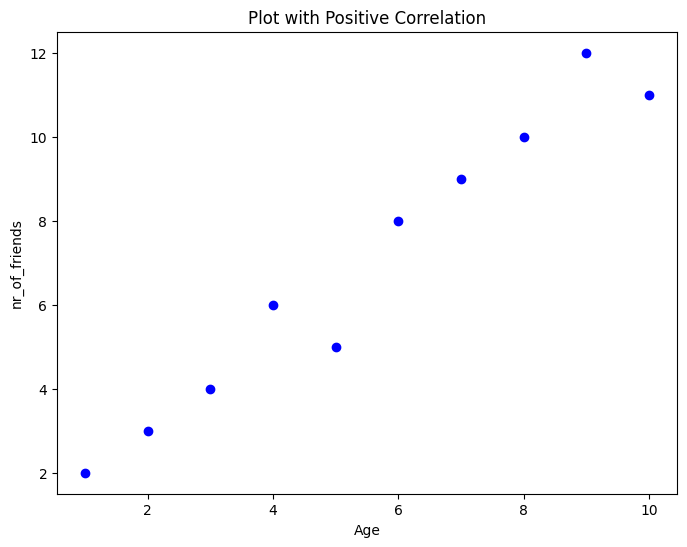

In [20]:
assert _hash(exercise_4_plot_type) == '90a8cbb480', 'Try again'

print('Yes indeed! It is a great start to use those when you want to understand your variables. Here you see, for example, how a positive correlation will look like. But no worry if this is new to you, bc you are going to learn more about this subject later.')


# Two variables with a positive correlation
age = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
nr_of_friends = np.array([2, 3, 4, 6, 5, 8, 9, 10, 12, 11])

# Create the plot
plt.figure(figsize=(8, 6))
plt.scatter(age, nr_of_friends, color='b', marker='o')
plt.xlabel('Age')
plt.ylabel('nr_of_friends')
plt.title('Plot with Positive Correlation');


<div class="alert alert-warning">
⚠️ <b>NOTE: </b>Make sure you use the dataframe named <b>grouped_by_experience</b> for the following exercise
</div>

We already saw this correlation between ** `salaries `** and ** `experience level `**. <br> 
 Lets make another visualization to show off your skills. Now we are going to make vertically bar plot using "barh" from the matplotlib.<br>

Plot this visualization using the "grouped_by_experience" dataset again and add the following extra information:

- label the **x-axis** as **`Salary (median)`**.
- label the **y-axis** as **`Experience Level`**.
- change the **plot color** to **`orange`**.
- name the **titel** **`Median Salary by Experience Level`**



In [21]:
grouped_by_experience

,experience_level,salary_in_usd
0,EN,61643.318182
1,MI,87996.056338
2,SE,138617.292857
3,EX,199392.038462


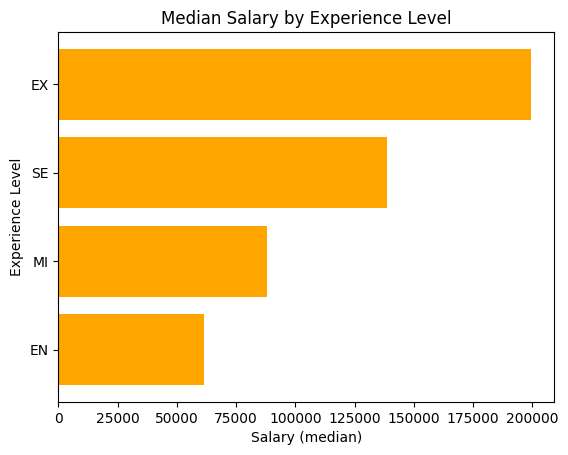

In [22]:
# YOUR CODE HERE
# Plotting
plt.barh(grouped_by_experience['experience_level'], grouped_by_experience['salary_in_usd'], color='orange')

# Adding labels and title
plt.xlabel('Salary (median)')
plt.ylabel('Experience Level')
plt.title('Median Salary by Experience Level')


axis = plt.gca();

In [23]:
pc = PlotChecker(axis)
bars = axis.patches  # Get the bar patches
colors = [bar.get_facecolor() for bar in bars] # Get the face color of each bar

expected_color = (1.0, 0.647, 0.0, 1.0)
margin = 0.01 
assert all(
    all(abs(c - ec) < margin for c, ec in zip(color, expected_color))
    for color in colors
), "The bar plot color should be 'orange'"


pc.assert_xlabel_equal('Salary (median)'), "The x label seems wrong"
pc.assert_ylabel_equal('Experience Level'), "The y label seems wrong"
pc.assert_title_equal('Median Salary by Experience Level'), "Did you put a title for your plot?"


print('That looks beautifull. You are on a roll!')




That looks beautifull. You are on a roll!


## Exercise  5

YEP! Here we go talking a little bit more about outliers. Outliers are often an important subject before you want to do any analyses on your dataset. They can influence your results in a bad way mostly, so we can not ignore them. To find outliers in the ¨ds_salaries" dataset, you can use statistical methods and visualization techniques. 

1. Which of the following visualization would help you identify outliers per variable?
2. Which technique is best to use if you comparing two variables?

    A. 1. Line plot, 2. Scatter plot 

    B. 1. Box plot, 2. Histogram   

    C. 1. Line plot, 2. Histogram 

    D. 1. Box plot, 2. Scatter plot 

In [24]:
# YOUR CODE HERE
exercise_5_plot_type = 'D'

In [25]:
assert _hash(exercise_5_plot_type) == '23db524fe4', 'Try again'

print('Yes indeed! Those show the distribution of data, highlighting any values that are significantly lower or higher than others. Outliers are represented as individual data points in your graph. And the other plots visualize outliers effectively, especially when comparing two variables. Data points that are far from the cluster can be considered outliers.')


Yes indeed! Those show the distribution of data, highlighting any values that are significantly lower or higher than others. Outliers are represented as individual data points in your graph. And the other plots visualize outliers effectively, especially when comparing two variables. Data points that are far from the cluster can be considered outliers.


I know, I know; You already made that beautifull orange boxplot, but you can do even better. Now you also want, just as in excercise 3, see the outliers if you plot "Salary distributed by experience level" 

- make a boxplot with the ds_salaries dataset that displays the variable **`salary_in_usd`** by **`experience_level`** that allows to check if there are outliers.
- change the default **plot style** to **`ggplot`**.
- set the plot argument **vert** to **`False`**.
- set the plot argument **figsize** to **`9`** inches width and **`9`** inches height.
- set the plot argument **grid** to **`False`**
- set the plot argument **fontsize** to **`20`**

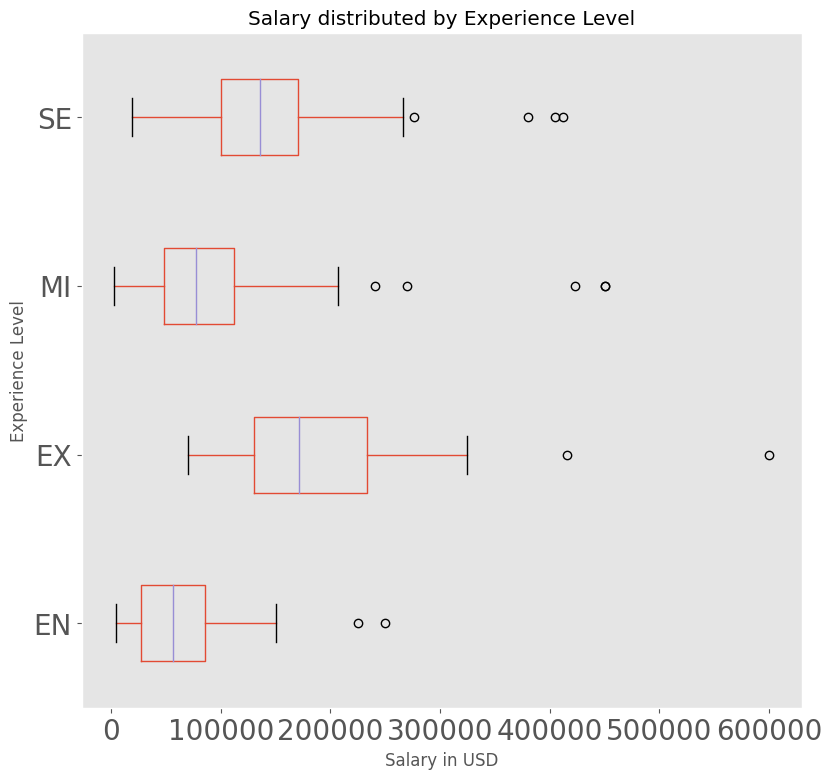

In [26]:
# YOUR CODE HERE
# Change the default plot style to ggplot
plt.style.use('ggplot')

# Boxplot using pandas plotting capabilities
ax = ds_salaries.boxplot(column='salary_in_usd',
                         by='experience_level',
                         vert=False,
                         figsize=(9, 9),
                         grid=False,
                         fontsize=20)

# Setting the title and labels
ax.set_title('Salary distributed by Experience Level')
ax.set_xlabel('Salary in USD')
ax.set_ylabel('Experience Level')
plt.suptitle('')  # This line removes the default "Boxplot grouped by" subtitle

axis = plt.gca();

In [27]:
pc = PlotChecker(axis)
pc._lines = pc.axis.get_lines()
pc.colors = np.array([pc._color2rgb(x.get_color()) for x in pc._lines])

assert _hash(ds_salaries['experience_level'].unique()) in ['269e35d1a3'], "Did you filter by experience level?"
assert _hash(pc.colors[0]) in ['78183b94a9'], "Did you set the right plot style?"
assert _hash(pc.yticklabels) in ['3b1ecfaee1'], "Did you select the right categorical variable for the plot?"
assert _hash(pc.xticklabels) in ['fee1fd8744'], "Did you select the right categorical variable for the plot?"


print("Great work! Lets go to the last exercise.")

Great work! Lets go to the last exercise.


## Exercise 6

There is another plot that can tell us a lot about the statistics of the data. These are normally plots that show us the distribution of variables. 

Which plot can we use to visualize exactly how the **`salary`** is distributed in the per country?

    A. Box plot   
    B. Bar plot  
    C. Histogram   
    D. Pie plot

In [28]:
# YOUR CODE HERE
exercise_6_plot_type = "C"

In [29]:
assert _hash(exercise_6_plot_type) == 'f72385315c', 'Try again'

print('--- Success ---')

--- Success ---


In this case, without using any kind of aggregation, we would like to know if in the US Data Scientists all have the same salaries or is there some equal distribution happening? To find this, follow these steps:

- filter the ds_salaries dataset only on company_location == 'US" 
- save the filtered dataset in a new variable named `us_salaries`
- Define the bin edges by creating a list between 40000 usd and 16000 usd with steps of 10000 usd
- Define colors for each experience level using ['b', 'g', 'r', 'c'] 
- When you are going to create your histogram, give it the following glow up:
       -- give it the bin list you just created
       -- set the edgecolor to black
       -- set the opacity to 0.7
       -- give it the colors you determined in the step one level above here
       -- label it as 'experience_levels'
- x label is 'Salary in USD'
- y label is 'Number of Employees'
- title of the plot is 'Salary Distribution in the US'
- Add a legend to display the experience levels

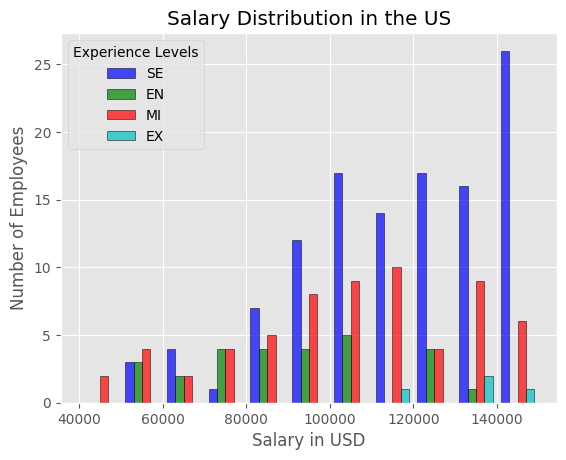

In [30]:
# 1. Filter the ds_salaries dataset for 'US' location
us_salaries = ds_salaries[ds_salaries['company_location'] == 'US']

# 2. Define the bin edges
bins = list(range(40_000, 160_000, 10_000)) #list(range(4000, 600000, 10000))

# 3. Define colors for each experience level
colors = ['b', 'g', 'r', 'c']


# Get experience levels
#us_salaries[us_salaries['experience_level'] == 'SE']['salary_in_usd']

levels = us_salaries['experience_level'].unique().tolist()

#experience_levels = us_salaries['experience_level'].unique()
x1 = us_salaries[us_salaries['experience_level'] == 'SE']['salary_in_usd']
x2 = us_salaries[us_salaries['experience_level'] == 'EN']['salary_in_usd']
x3 = us_salaries[us_salaries['experience_level'] == 'MI']['salary_in_usd']
x4 = us_salaries[us_salaries['experience_level'] == 'EX']['salary_in_usd']


plt.hist([x1,x2,x3,x4], color=colors, bins= bins,
         edgecolor='black',alpha=0.7, label=levels,
         #density=True, stacked = True
        )

#plt.xlim(40_000, 160_000)  

# 5. Set the labels and title
plt.xlabel('Salary in USD')
plt.ylabel('Number of Employees')
plt.title('Salary Distribution in the US')

# Add a legend to display the experience levels
plt.legend(title='Experience Levels')


axis = plt.gca();

In [31]:
## YOUR CODE HERE
## 1. Filter the ds_salaries dataset for 'US' location
#us_salaries = ds_salaries[ds_salaries['company_location'] == 'US']
#
## 2. Define the bin edges
#bins = list(range(40000, 160000, 10000)) #list(range(4000, 600000, 10000))
#
## 3. Define colors for each experience level
#colors = ['b', 'g', 'r', 'c']
#
#
## Get experience levels
#experience_levels = us_salaries['experience_level'].unique()
#
##  map the experience levels to colors as follows:
#color_map = {level: color for level, color in zip(experience_levels, colors)}
#
#for level in experience_levels:
#    # Filter the salaries for the current experience level
#    level_salaries = us_salaries[us_salaries['experience_level'] == level]['salary_in_usd']
#    
#    plt.hist(level_salaries, bins=bins, edgecolor='black', alpha=0.7, color=color_map[level], label=level)
#
## 5. Set the labels and title
#plt.xlabel('Salary in USD')
#plt.ylabel('Number of Employees')
#plt.title('Salary Distribution in the US')
#
## Add a legend to display the experience levels
#plt.legend(title='Experience Levels')
#
#
#axis = plt.gca();


In [40]:
pc = PlotChecker(axis)
pc._patches = np.array(pc.axis.patches)
pc._patches = pc._patches[np.argsort([p.get_x() for p in pc._patches])]
pc.widths = np.array([p.get_width() for p in pc._patches])
pc.heights = np.array([p.get_height() for p in pc._patches])
l = [pc.xlabel] + [pc.ylabel]
l.sort()

assert _hash(pc.yticklabels) in ['d0384353d2'], 'Did you select the right categorical variable for the plot?'
assert _hash(pc.xticklabels) in ['1148bf6f68'], 'Did you select the right numerical variable for the plot?'
assert _hash(np.sort(pc.widths)) in ['4dcfd8bd6f'], "Did you set the right plot type? You should not change the dataset."
assert _hash(np.sort(pc.heights)) in ['fc5f0f0c70'], "Did you set the right plot type? You should not change the dataset."
assert _hash(pc.xlim[0]) == 'ebfc11d124', "Did you set the right limit?"
assert _hash(pc.xlim[1]) == 'dbfbe1a27b', "Did you set the right limit?"
assert _hash([pc._patches[i].get_facecolor() for i,n in enumerate(pc._patches)]) == '326d99a246', "Did you change the plot color?"
assert _hash([pc._patches[i].get_edgecolor() for i,n in enumerate(pc._patches)]) == 'c07f99d056', 'Did you change the plot edgecolor?'
assert _hash(len(pc._patches)) in ['8d8aadfa20'], 'Did you set the right variable and the right plot type?'
assert _hash(pc.title) in ['2171b17949'], 'Did you set the right plot title?'
assert _hash(l) in ['7e584dc21f'], 'Did you set the right plot axes?'
assert _hash(ds_salaries['experience_level'].unique()) in ['269e35d1a3'], 'Did you filter by experience level?'



print("          ------ YOU MADE IT !!! CONGRATS !!! WE ARE SUPER PROUD OF YOU !!! --------                                 Looking at the salary distribution from least to most experienced levels (EN, MI, SE, EX), we would expect that the median salary would follow a pattern from left to right, with EN having the lowest median salary, then MI, SE, and finally EX with the highest. This pattern is what we can visually observe.However, there is an interesting observation. There is a very high bar for 'SE' (Senior) at the highest salary bin. This suggests that there are many employees with 'SE' experience who are receiving salaries similar to those of 'EX' (Experienced) employees, even though they hold the 'SE' job title. There could be various explanations for this, but for now we only wanted to see the power of visualizing the distribution in a histogram.")

          ------ YOU MADE IT !!! CONGRATS !!! WE ARE SUPER PROUD OF YOU !!! --------                                 Looking at the salary distribution from least to most experienced levels (EN, MI, SE, EX), we would expect that the median salary would follow a pattern from left to right, with EN having the lowest median salary, then MI, SE, and finally EX with the highest. This pattern is what we can visually observe.However, there is an interesting observation. There is a very high bar for 'SE' (Senior) at the highest salary bin. This suggests that there are many employees with 'SE' experience who are receiving salaries similar to those of 'EX' (Experienced) employees, even though they hold the 'SE' job title. There could be various explanations for this, but for now we only wanted to see the power of visualizing the distribution in a histogram.


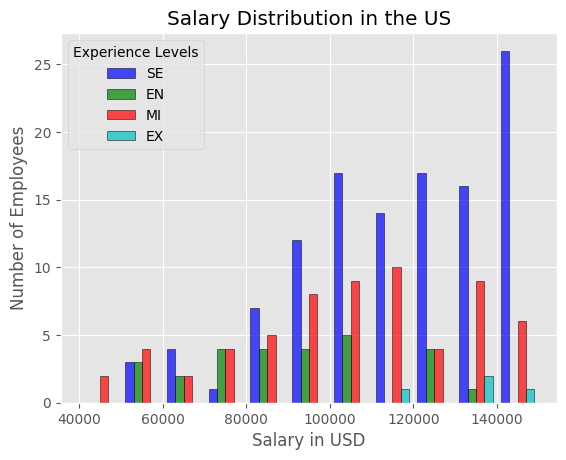

In [39]:
# Filter the dataset for 'US' location
us_salaries = ds_salaries[ds_salaries['company_location'] == 'US']

# Define the bin edges and colors
bins = list(range(40_000, 160_000, 10_000))
colors = ['b', 'g', 'r', 'c']

# Get unique experience levels
levels = us_salaries['experience_level'].unique()

# Create a grouped histogram
plt.hist([us_salaries[us_salaries['experience_level'] == level]['salary_in_usd'] for level in levels],
         color=colors, bins=bins, edgecolor='black', alpha=0.7, label=levels)

# Set labels and title
plt.xlabel('Salary in USD')
plt.ylabel('Number of Employees')
plt.title('Salary Distribution in the US')

# Add a legend to display the experience levels
plt.legend(title='Experience Levels')

# Display the plot
plt.show()


# 🏁 Ungraded Exercise 🏁
Load the file misterious_data.csv and use data visualization to answer the following questions:

* How is the distribution of **x** in general?
* Are there any **outlier** in any of the fields?
* Which **2 charts** better represent the underlying data?
* Change their **style** to **`bmh`**.
* Add **titles** to each chart explaining them.